Does Covid-19 have the same impact on the developed countries and the developing countries's employement?

In [1]:
#Author: Jiayi Zhou
#Email: jiayizhou@berkeley.edu
#Course: DIGHUM100 
#Instructor: Adam Anderson

In [2]:
# Imported the libraries needed by this project, this code has referenced the Data8 course 
# taught at Berkeley during Srping 2020. 
import numpy as np
import pandas as pd

from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [3]:
# Instructions for dataset import
# Step 1: Save the employment_data.csv somewhere in your drive. 
# Step 2: Click on the "File" button on the left vertical bar. 
# Step 3: Find employment_data.csv, right click, and copy the path. 
# Step 4: Paste the path in the parentheses after Table.read_table below.

In [4]:
# imported the employment dataset. The dummy variable is added by myself according to the United Nation's publication. 
# I have categorized all the transitioning countries into developing countries, as they are not yet fully developed 
# by definition
# location in author's Drive: "/content/drive/MyDrive/Dataset for DIGHUM100/employment_data.csv"
employment = Table.read_table("employment_data.csv")
employment

country,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64,Developing Country
Afghanistan,350286,6.5,607.476,506.23,3.57,1334.24,5424.91,16.2,1
Angola,457913,8.6,1075.84,896.532,1.7,4612.11,4724.67,27.1,1
Albania,49922.5,3.9,51.087,42.572,1.77,500.112,651.87,25.5,1
United Arab Emirates,320690,9.3,824.579,687.149,0.41,996.03,5111.77,38.6,1
Argentina,525994,21,3492.56,2910.47,1.43,7264.33,9496.19,18.1,1
Armenia,31639,16.8,159.418,132.848,1.72,407.158,519.975,15.8,1
Australia,403947,4.7,503.053,419.211,0.99,5017.15,5849.21,24.6,0
Austria,142519,10.5,417.616,348.013,1.05,1843.94,2109.05,23.8,0
Azerbaijan,153216,14.1,630.631,525.526,1.13,2106.55,2237.43,21.7,1
Burundi,203900,-0.1,-4.467,-3.723,1.36,1931.62,1838.08,32.7,1


In [5]:
# DESCRIPTIONS OF THE COLUMNS IN THE DATASETS BASED ON KAGGLE - DIRECTLY QUOTED FROM KAGGLE 
# Note: Collated various datasets from covid monitoring section. Most of the estimates are from 2020.
# country - Name of Country
# total_weekly_hours_worked(estimates_in_thousands) - Total weekly hours worked of employed persons
# percentage_of_working_hrs_lost(%) - Percentage of hours lost compared to the baseline (4th quarter of 2019)
# percent_hours_lost_40hrs_per_week(thousands) - Percentage of hours lost compared to the baseline (4th quarter of 2019) expressed in full-time equivalent employment losses. This measure is constructed by dividing the number of weekly hours lost due to COVID-19 and dividing them by 40.
# percent_hours_lost_48hrs_per_week(thousands) - Percentage of hours lost compared to the baseline (4th quarter of 2019) expressed in full-time equivalent employment losses. This measure constructed by dividing the number of weekly hours lost due to COVID-19 and dividing them by 48.
# labour_dependency_ratio - Ratio of dependants (persons aged 0 to 14 + persons aged 15 and above that are either outside the labour force or unemployed) to total employment.
# employed_female_25+_2019(estimates in thousands) - Employed female in 2019 who, during a specified brief period, were in one of the following categories: a) paid employment (whether at work or with a job but not at work); or b) self-employment (whether at work or with an enterprise but not at work).
# employed_male_25+_2019(estimates in thousands) - Employed male in 2019 who, during a specified brief period, were in one of the following categories: a) paid employment (whether at work or with a job but not at work); or b) self-employment (whether at work or with an enterprise but not at work).
# ratio_of_weekly_hours_worked_by_population_age_15-64 - Ratio of total weekly hours worked to population aged 15-64.

In [6]:
# the number of countries that are included in the datasets
len(employment.column('country'))

189

In [7]:
# the proportion of countries in the table that is a developing country
np.average(employment.column('Developing Country') == 1)

0.8095238095238095

In [8]:
# selected all the countries that are developing countries
employment_developing = employment.where('Developing Country', are.equal_to(1))
# calculated the average percentage of working hours loss in the developing countries
developing_percentage_working_hours_lost = np.average(employment_developing.column('percentage_of_working_hrs_lost'))
developing_percentage_working_hours_lost                                                                                                                

9.169281045751635

In [9]:
# selected all the countries that are developed countries
employment_developed = employment.where('Developing Country', are.equal_to(0))
# calculated the average percentage of working hours loss in the developed countries
developed_percentage_working_hours_lost = np.average(employment_developed.column('percentage_of_working_hrs_lost'))
developed_percentage_working_hours_lost

7.319444444444445

In [10]:
# calculated the dependency ratio in the developing countries. 
developing_dependency_ratio = np.average(employment_developing.column('labour_dependency_ratio'))
developing_dependency_ratio

1.7208496732026142

In [11]:
# calculated the dependency ratio in the developed countries. 
developed_dependency_ratio = np.average(employment_developed.column('labour_dependency_ratio'))
developed_dependency_ratio

1.2297222222222224

/opt/conda/lib/python3.8/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


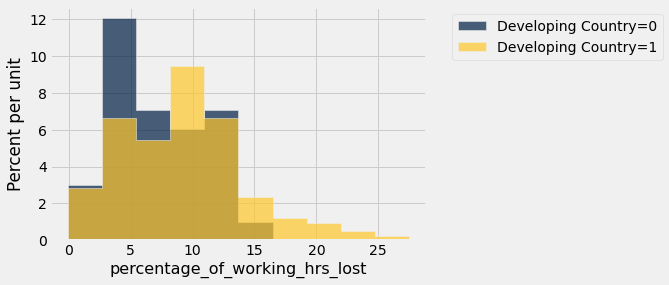

In [12]:
# Visualization 1: percentage of working hours lost in the developed/developing countries.
working_hour_visualization= employment.select('Developing Country', 'percentage_of_working_hrs_lost')
working_hour_visualization.hist('percentage_of_working_hrs_lost', group = 'Developing Country')

/opt/conda/lib/python3.8/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


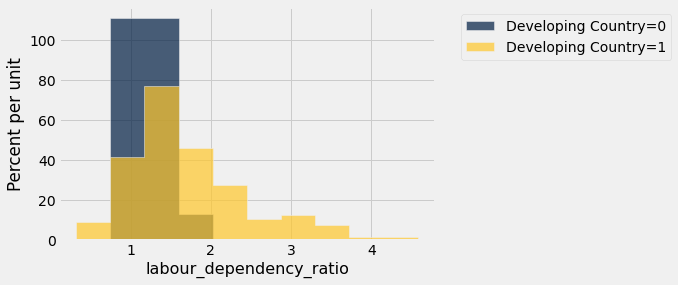

In [13]:
# Visualization 2: labour dependency ratios in the developed/developing countries.
dependency_visualization = employment.select('Developing Country', 'labour_dependency_ratio')
dependency_visualization.hist('labour_dependency_ratio', group = 'Developing Country')

In [14]:
# Investigate whether Covid-19 has impacted the employment rates of thedeveloped and developing countries
# differently by conducting a hypothesis testing.

In [15]:
# AB Testing: Does the percentage of working hours lost in the developed countries come from the same underlying 
# distribution with the developing countries? 
# Null Hypothesis: In the world, the percentage of weekly working hours lost in the developing countries and the
# developed countries are the same. 
# Alternative Hypothesis: In the world, the percentage of weekly working hours lost in the developing countries is more
# than the developed countries. 
# Test Statistics: Percentage of weekly working hours lost in developing countries - in the developed countries. 
# Positive test statistics favor the alternative.

# Reference: The coding of this AB Testing and P-value calculation were taught in DATA8 course which I took at Berkeley
# during Spring 2020. 

In [16]:
# Select only the percentage of working hour loss column and the dummy variable "Developing Country"
AB_Testing_table = employment.select('Developing Country','percentage_of_working_hrs_lost')
AB_Testing_table

Developing Country,percentage_of_working_hrs_lost
1,6.5
1,8.6
1,3.9
1,9.3
1,21
1,16.8
0,4.7
0,10.5
1,14.1
1,-0.1


In [17]:
# Calculate the observed statistics 
Average_developing = np.mean(AB_Testing_table.where('Developing Country', 1).column('percentage_of_working_hrs_lost'))
Average_developed = np.mean(AB_Testing_table.where('Developing Country', 0).column('percentage_of_working_hrs_lost'))
observed_statistics = Average_developing - Average_developed
observed_statistics

1.8498366013071905

In [18]:
# Shuffle the dummy variable column 
Shuffle = employment.sample(with_replacement = False).column('Developing Country')

In [19]:
# Combine the shuffled column with the original table 
AB_Testing = AB_Testing_table.with_column('Shuffled Developing Country', Shuffle)
AB_Testing

Developing Country,percentage_of_working_hrs_lost,Shuffled Developing Country
1,6.5,1
1,8.6,1
1,3.9,1
1,9.3,1
1,21,0
1,16.8,1
0,4.7,1
0,10.5,1
1,14.1,0
1,-0.1,1


In [20]:
# Created a stimulation function
def one_stimulation(table, label, group_label):
    # Created a shuffled_column with the group label
    Shuffled_column = table.sample(with_replacement = False).column(group_label)
    # Added the shuffled column to the originla table
    original_and_shuffled = table.with_column('Shuffled_label', Shuffled_column)
    # Selected only the developing country after shuffling
    shuffled_developing = original_and_shuffled.where('Shuffled_label', 1)
    # Selected only the developed country after shuffling
    shuffled_developed = original_and_shuffled.where('Shuffled_label', 0)
    # Calculated the difference
    difference = np.average(shuffled_developing.column(label)) - np.average(shuffled_developed.column(label))
    return difference 

In [21]:
differences_stimulation_results = make_array()

# 5000 trials of shuffling and difference calculation
for i in np.arange(5000):
    new_difference = one_stimulation(AB_Testing_table, 'percentage_of_working_hrs_lost', 'Developing Country')
    differences_stimulation_results = np.append(differences_stimulation_results, new_difference)

Observed Statistics: 1.8498366013071905


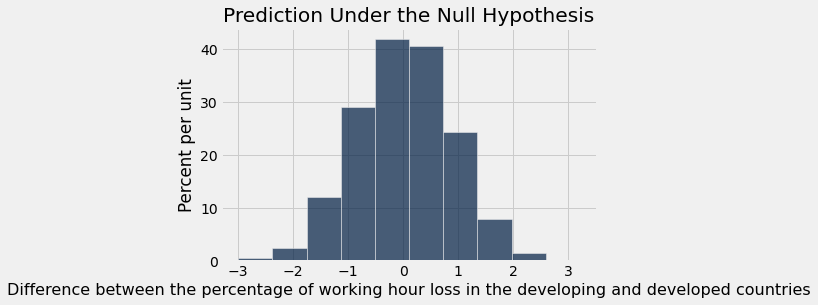

In [22]:
Table().with_column('Difference between the percentage of working hour loss in the developing and developed countries', differences_stimulation_results).hist()
print('Observed Statistics:', observed_statistics)
plots.title('Prediction Under the Null Hypothesis');

In [23]:
# p-value calculation
sum(differences_stimulation_results >= observed_statistics) / len(differences_stimulation_results)

0.0162

In [24]:
# Results Interpretation: If we take 5% as the significance level, the observed_statistics < 0.05. We would reject the null hypothesis 
# and conclude that the percentage of working hour loss in the developing countries is larger than the percentage of 
# working hour loss in the developed countries under the impact of covid-19. 

In [25]:
# generated a total employed population column by adding the employed female and the employed males together
employed_population = employment.column('employed_female_25+_2019') + employment.column('employed_male_25+_2019')

In [26]:
# put the column above into the original dataset - 
employment_with_population = employment.with_column('employed population in thousands', employed_population) 
employment_with_population

country,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64,Developing Country,employed population in thousands
Afghanistan,350286,6.5,607.476,506.23,3.57,1334.24,5424.91,16.2,1,6759.15
Angola,457913,8.6,1075.84,896.532,1.7,4612.11,4724.67,27.1,1,9336.78
Albania,49922.5,3.9,51.087,42.572,1.77,500.112,651.87,25.5,1,1151.98
United Arab Emirates,320690,9.3,824.579,687.149,0.41,996.03,5111.77,38.6,1,6107.8
Argentina,525994,21,3492.56,2910.47,1.43,7264.33,9496.19,18.1,1,16760.5
Armenia,31639,16.8,159.418,132.848,1.72,407.158,519.975,15.8,1,927.133
Australia,403947,4.7,503.053,419.211,0.99,5017.15,5849.21,24.6,0,10866.4
Austria,142519,10.5,417.616,348.013,1.05,1843.94,2109.05,23.8,0,3952.99
Azerbaijan,153216,14.1,630.631,525.526,1.13,2106.55,2237.43,21.7,1,4343.98
Burundi,203900,-0.1,-4.467,-3.723,1.36,1931.62,1838.08,32.7,1,3769.7


In [27]:
# The total weekly hours worked column in the datasets is an estimation after covid-19, so we would need to use this
# information and the percentage of working hours lost due to covid-19 to calculate the pre-shock total weekly 
# hours worked. The percentage of working hours lost is 
# negative (after-shock total hours - pre-shock total hours) / pre-shock total hours. 
# We can just convert this equation to (pre-shock total hours - after-shock total hours) / pre-shock total hours. 
# Then, the pre-shock total working hours = after-shock working hours / (1 - percentage_of_working_hrs_lost)

In [34]:
pre_shock_total_weekly_hours = employment_with_population.column('total_weekly_hours_worked(estimates_in_thousands)') / (1 - (0.01 * employment_with_population.column('percentage_of_working_hrs_lost')))
pre_shock_total_weekly_hours.item(0)

374637.0117647059

In [37]:
# put the column above in the table
# Since the total_weekly_hours_worked is an estimation from 2020, we would name the newly crated column "average weekly working hours after covid-19"
employment_pre_shock= employment_with_population.with_column('total_weekly_hours_worked before Covid-19 in thousands', pre_shock_total_weekly_hours)
employment_pre_shock

country,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64,Developing Country,employed population in thousands,total_weekly_hours_worked before Covid-19 in thousands
Afghanistan,350286,6.5,607.476,506.23,3.57,1334.24,5424.91,16.2,1,6759.15,374637
Angola,457913,8.6,1075.84,896.532,1.7,4612.11,4724.67,27.1,1,9336.78,500999
Albania,49922.5,3.9,51.087,42.572,1.77,500.112,651.87,25.5,1,1151.98,51948.5
United Arab Emirates,320690,9.3,824.579,687.149,0.41,996.03,5111.77,38.6,1,6107.8,353573
Argentina,525994,21,3492.56,2910.47,1.43,7264.33,9496.19,18.1,1,16760.5,665815
Armenia,31639,16.8,159.418,132.848,1.72,407.158,519.975,15.8,1,927.133,38027.7
Australia,403947,4.7,503.053,419.211,0.99,5017.15,5849.21,24.6,0,10866.4,423869
Austria,142519,10.5,417.616,348.013,1.05,1843.94,2109.05,23.8,0,3952.99,159239
Azerbaijan,153216,14.1,630.631,525.526,1.13,2106.55,2237.43,21.7,1,4343.98,178366
Burundi,203900,-0.1,-4.467,-3.723,1.36,1931.62,1838.08,32.7,1,3769.7,203696


In [36]:
# Since each country has different demography, the number of employed people is also different. A total number does
# not present comparable information across country. Therefore, we would need to calculate the weekly hours worked 
# per person in each country. 

In [41]:
# Create the column described above and add it to the table. 
average_weekly_working_hours_per_person = employment_pre_shock.column('total_weekly_hours_worked before Covid-19 in thousands')/employment_pre_shock.column('employed population in thousands')
employment_individual = employment_pre_shock.with_column('average weekly working hours per person', average_weekly_working_hours_per_person) 
employment_individual

country,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64,Developing Country,employed population in thousands,total_weekly_hours_worked before Covid-19 in thousands,average weekly working hours per person
Afghanistan,350286,6.5,607.476,506.23,3.57,1334.24,5424.91,16.2,1,6759.15,374637,55.4266
Angola,457913,8.6,1075.84,896.532,1.7,4612.11,4724.67,27.1,1,9336.78,500999,53.6587
Albania,49922.5,3.9,51.087,42.572,1.77,500.112,651.87,25.5,1,1151.98,51948.5,45.0949
United Arab Emirates,320690,9.3,824.579,687.149,0.41,996.03,5111.77,38.6,1,6107.8,353573,57.8887
Argentina,525994,21,3492.56,2910.47,1.43,7264.33,9496.19,18.1,1,16760.5,665815,39.7252
Armenia,31639,16.8,159.418,132.848,1.72,407.158,519.975,15.8,1,927.133,38027.7,41.0164
Australia,403947,4.7,503.053,419.211,0.99,5017.15,5849.21,24.6,0,10866.4,423869,39.0075
Austria,142519,10.5,417.616,348.013,1.05,1843.94,2109.05,23.8,0,3952.99,159239,40.2832
Azerbaijan,153216,14.1,630.631,525.526,1.13,2106.55,2237.43,21.7,1,4343.98,178366,41.0605
Burundi,203900,-0.1,-4.467,-3.723,1.36,1931.62,1838.08,32.7,1,3769.7,203696,54.0351


In [43]:
# the mean for average weekly working hours per person in the developing country
np.mean(employment_individual.where('Developing Country', 1).column('average weekly working hours per person'))

48.67377000392789

In [44]:
# the mean for average weekly working hours per person in the developed country
np.mean(employment_individual.where('Developing Country', 0).column('average weekly working hours per person'))

40.441416006340035

In [45]:
# results interpretations: numerically speaking, it is true that the employees in the developing countries work
# longer per week compare with the developed countries. 

/opt/conda/lib/python3.8/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


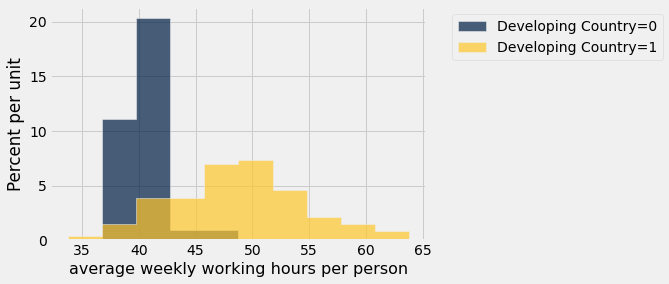

In [46]:
# Visualization 3: individual's weekly working hours before Covid-19 in the developed/developing countries.
pre_shock_weekly_hours_visualization = employment_individual.select('Developing Country', 'average weekly working hours per person')
pre_shock_weekly_hours_visualization.hist('average weekly working hours per person', group = 'Developing Country')